In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=150)
lngs = np.random.uniform(low=-180.000, high=180.000, size=150)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-11.152431083984027 127.62534776145009
-50.664502281105065 80.9571050598251
39.57597106154074 -147.17666839526964
43.44572010767388 147.27038180368248
-38.53676572989008 63.29039632779546
40.34812814841948 -93.53158126533361
66.96266472465555 -136.16151432747614
1.4205676329106467 -53.70755350515803
-83.71464588253568 -23.907981840429414
1.3823320983870957 -85.28676736707726
38.51677937426868 -29.18136898275904
-11.601523131102255 88.43000892300194
-24.80899858414577 146.44188189666772
-0.36308905152795035 -89.5499757656791
81.49862173995845 -13.1328516880439
-8.944131013771951 168.4143118668012
23.87634828035985 -173.32641868536479
-64.73113795849835 176.17436710897402
-27.60510735782546 165.95613728127535
74.86146890036986 91.44840712738659
-44.48200328691402 -103.08551285311476
21.1943477985741 -27.21141263607751
34.596722627489996 127.19993946772513
-0.8365087196023637 -66.36939467447121
-77.58528972992461 -59.22268378710626
-52.76186344602858 -85.37482047621552
68.80417768346905 -

In [11]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

116

In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests

In [14]:
# Import the API key.
from config import weather_api_key

In [15]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=75c15f2d8731134439f6a12ada8359df


In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [17]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | nguiu
City not found. Skipping...
Processing Record 2 of Set 1 | mahebourg
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | yuzhno-kurilsk
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | kirksville
Processing Record 7 of Set 1 | aklavik
Processing Record 8 of Set 1 | camopi
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | san cristobal
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | bengkulu
Processing Record 13 of Set 1 | emerald
Processing Record 14 of Set 1 | puerto baquerizo moreno
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | lata
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | kaitangata
Processing Record 19 of Set 1 | vao
Processing Record 20 of Set 1 | talnakh
Processing Record 21 of Set 1 | castro
Processing Record 22 of Set 1 | ponta do sol
Processing Record 23 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,51.48,35,6,2.44,NZ,2021-09-27 00:56:20
1,Punta Arenas,-53.1500,-70.9167,41.11,75,0,10.36,CL,2021-09-27 00:58:50
2,Ponta Do Sol,32.6667,-17.1000,70.43,70,27,3.36,PT,2021-09-27 00:58:13
3,Pedernales,18.0384,-71.7440,82.49,77,95,2.44,DO,2021-09-27 00:58:51
4,Castro,-24.7911,-50.0119,63.05,73,2,4.27,BR,2021-09-27 00:58:51
5,Rikitea,-23.1203,-134.9692,73.78,72,2,19.42,PF,2021-09-27 00:56:01
6,Kungurtug,50.5994,97.5228,32.50,90,77,4.32,RU,2021-09-27 00:58:03
7,Butaritari,3.0707,172.7902,83.97,72,99,15.88,KI,2021-09-27 00:58:52
8,Zambezi,-13.5432,23.1047,64.02,28,55,4.12,ZM,2021-09-27 00:58:52
9,Busselton,-33.6500,115.3333,59.09,80,48,13.80,AU,2021-09-27 00:58:53


In [13]:
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-09-27 00:56:20,-46.1927,168.8643,51.48,35,6,2.44
1,Punta Arenas,CL,2021-09-27 00:58:50,-53.1500,-70.9167,41.11,75,0,10.36
2,Ponta Do Sol,PT,2021-09-27 00:58:13,32.6667,-17.1000,70.43,70,27,3.36
3,Pedernales,DO,2021-09-27 00:58:51,18.0384,-71.7440,82.49,77,95,2.44
4,Castro,BR,2021-09-27 00:58:51,-24.7911,-50.0119,63.05,73,2,4.27
5,Rikitea,PF,2021-09-27 00:56:01,-23.1203,-134.9692,73.78,72,2,19.42
6,Kungurtug,RU,2021-09-27 00:58:03,50.5994,97.5228,32.50,90,77,4.32
7,Butaritari,KI,2021-09-27 00:58:52,3.0707,172.7902,83.97,72,99,15.88
8,Zambezi,ZM,2021-09-27 00:58:52,-13.5432,23.1047,64.02,28,55,4.12
9,Busselton,AU,2021-09-27 00:58:53,-33.6500,115.3333,59.09,80,48,13.80


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

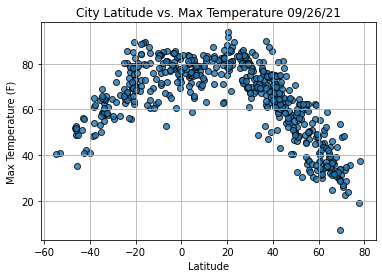

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

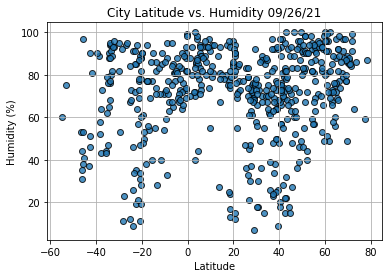

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

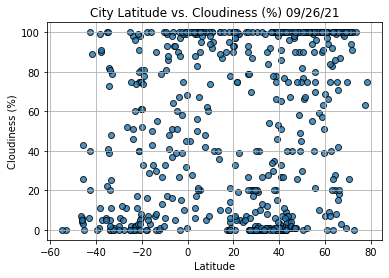

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

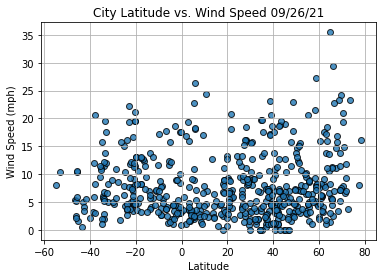

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [72]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"The p-value is {round(p_value,3)}.")

In [73]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-09-27 00:56:20,-46.1927,168.8643,51.48,35,6,2.44
1,Punta Arenas,CL,2021-09-27 00:58:50,-53.1500,-70.9167,41.11,75,0,10.36
2,Ponta Do Sol,PT,2021-09-27 00:58:13,32.6667,-17.1000,70.43,70,27,3.36
3,Pedernales,DO,2021-09-27 00:58:51,18.0384,-71.7440,82.49,77,95,2.44
4,Castro,BR,2021-09-27 00:58:51,-24.7911,-50.0119,63.05,73,2,4.27


In [74]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

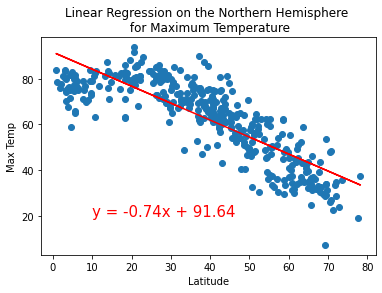

The p-value is 0.0.


In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,20))

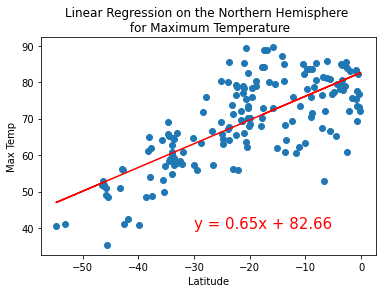

The p-value is 0.0.


In [76]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(-30,40))

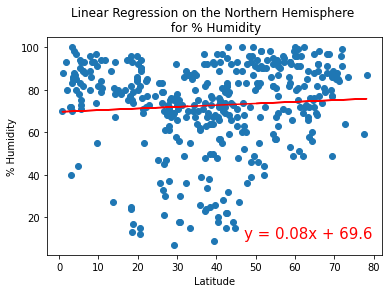

The p-value is 0.159.


In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(47,10))

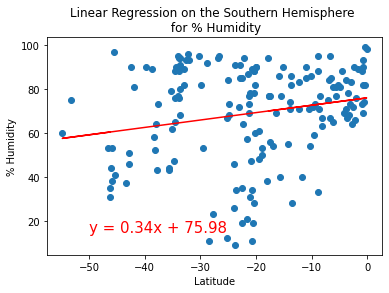

The p-value is 0.007.


In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

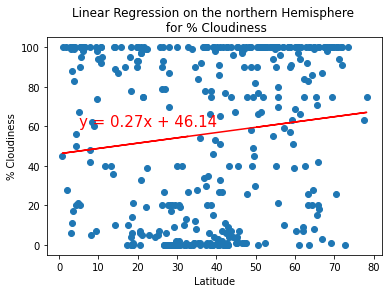

The p-value is 0.015.


In [79]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the northern Hemisphere \n for % Cloudiness', '% Cloudiness',(5,60))


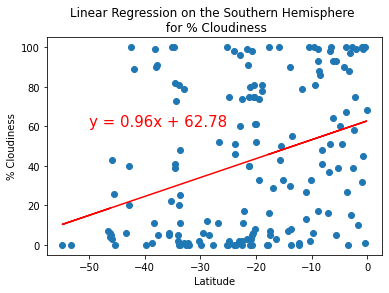

The p-value is 0.0.


In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

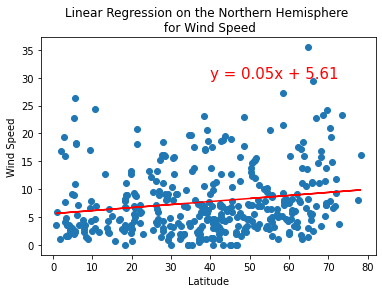

The p-value is 0.001.


In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,30))

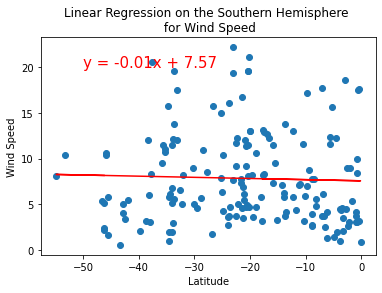

The p-value is 0.657.


In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))